In [ ]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [2]:
import pandas as pd
data = pd.read_csv('FremontBridge12-18.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [3]:
data.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-09-30 19:00:00,18.0,17.0
2018-09-30 20:00:00,8.0,16.0
2018-09-30 21:00:00,3.0,4.0
2018-09-30 22:00:00,2.0,7.0
2018-09-30 23:00:00,6.0,4.0


In [4]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)

In [6]:
# to do:
data['Total'] = data['West'] + data['East']
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


## Visualize the Data

In [7]:
# first some standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # plot styling
seaborn.set_context(font_scale=1.5)
import numpy as np

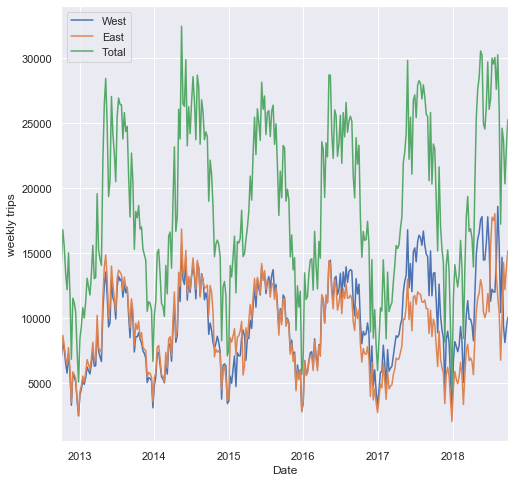

In [8]:
data.resample('W').sum().plot(figsize=(8, 8))
plt.ylabel('weekly trips');

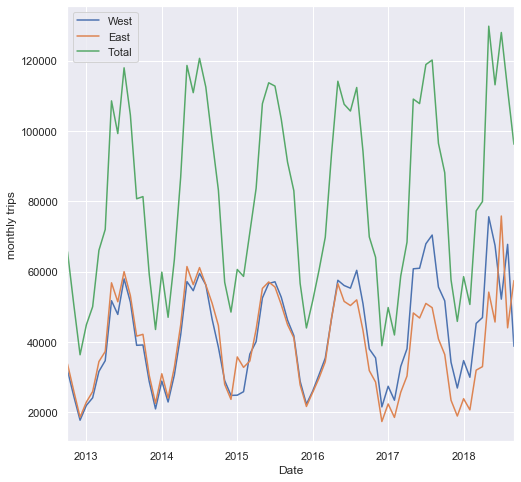

In [9]:
# to do: 
data.resample('M').sum().plot(figsize=(8, 8))
plt.ylabel('monthly trips');

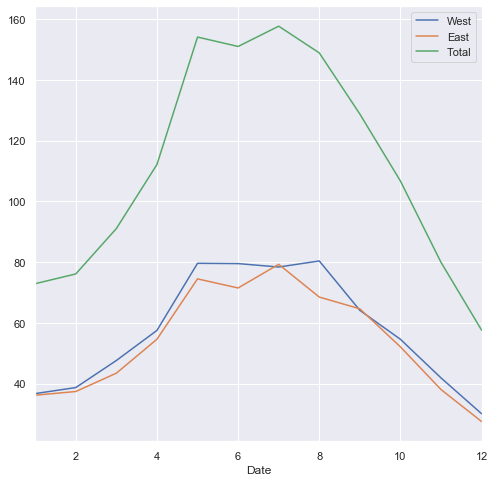

In [10]:
data.groupby(data.index.month).mean().plot(figsize=(8, 8));

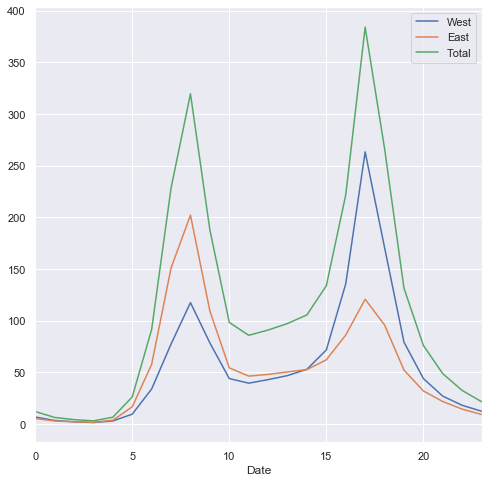

In [11]:
# to do: 
data.groupby(data.index.hour).mean().plot(figsize=(8, 8));

## Transforming the Data

In [12]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour)
pivoted.head()

East                                                         ...  \
Date         0     1    2    3    4     5      6      7      8      9   ...   
2012-10-03  4.0   4.0  1.0  2.0  6.0  21.0  105.0  257.0  291.0  172.0  ...   
2012-10-04  7.0   3.0  3.0  0.0  7.0  15.0   91.0  230.0  284.0  147.0  ...   
2012-10-05  4.0   4.0  4.0  2.0  7.0  18.0   68.0  218.0  251.0  131.0  ...   
2012-10-06  8.0  10.0  7.0  1.0  4.0   3.0   12.0   17.0   58.0   59.0  ...   
2012-10-07  6.0  12.0  2.0  4.0  1.0   6.0    9.0   14.0   43.0   67.0  ...   

             West                                                             
Date           14     15     16     17     18     19    20    21    22    23  
2012-10-03   51.0   92.0  182.0  391.0  258.0   69.0  51.0  38.0  25.0  12.0  
2012-10-04   56.0   74.0  161.0  353.0  241.0  107.0  56.0  39.0  21.0  30.0  
2012-10-05   62.0   84.0  190.0  290.0  209.0   73.0  41.0  31.0  26.0  16.0  
2012-10-06  114.0   96.0   76.0   73.0   55.0   38.0  18.0  15.0  20.0  19.0  
2012-10-07  115.0  109.0   93.0   73.0   45.0   23.0  36.0  35.0   9.0  11.0  

[5 rows x 48 columns]

In [13]:
first_five_east = pivoted.iloc[:5, :24]
first_five_east

East                                                         ...  \
Date         0     1    2    3    4     5      6      7      8      9   ...   
2012-10-03  4.0   4.0  1.0  2.0  6.0  21.0  105.0  257.0  291.0  172.0  ...   
2012-10-04  7.0   3.0  3.0  0.0  7.0  15.0   91.0  230.0  284.0  147.0  ...   
2012-10-05  4.0   4.0  4.0  2.0  7.0  18.0   68.0  218.0  251.0  131.0  ...   
2012-10-06  8.0  10.0  7.0  1.0  4.0   3.0   12.0   17.0   58.0   59.0  ...   
2012-10-07  6.0  12.0  2.0  4.0  1.0   6.0    9.0   14.0   43.0   67.0  ...   

                                                                             
Date           14     15     16     17     18    19    20    21    22    23  
2012-10-03   77.0   72.0  133.0  192.0  122.0  59.0  29.0  25.0  24.0   5.0  
2012-10-04   63.0   73.0  114.0  154.0  137.0  57.0  27.0  31.0  25.0  11.0  
2012-10-05   63.0   80.0  120.0  144.0  107.0  42.0  27.0  11.0  10.0  16.0  
2012-10-06   89.0  115.0  107.0  107.0   41.0  40.0  25.0  18.0  14.0  15.0  
2012-10-07  126.0  122.0  132.0  118.0   68.0  26.0  19.0  12.0   9.0   5.0  

[5 rows x 24 columns]

In [14]:
# to do:
first_five_west = pivoted.iloc[:5, 24:]
first_five_west

West                                                       ...  \
Date          0    1    2    3    4     5     6      7      8      9   ...   
2012-10-03   9.0  6.0  1.0  3.0  1.0  10.0  50.0   95.0  146.0  104.0  ...   
2012-10-04  11.0  0.0  6.0  3.0  1.0  11.0  51.0   89.0  134.0   94.0  ...   
2012-10-05   7.0  4.0  3.0  2.0  2.0   7.0  37.0  101.0  119.0   81.0  ...   
2012-10-06   7.0  5.0  2.0  2.0  1.0   2.0  15.0   16.0   47.0   55.0  ...   
2012-10-07   5.0  5.0  1.0  2.0  2.0   3.0   8.0   12.0   26.0   36.0  ...   

                                                                              
Date           14     15     16     17     18     19    20    21    22    23  
2012-10-03   51.0   92.0  182.0  391.0  258.0   69.0  51.0  38.0  25.0  12.0  
2012-10-04   56.0   74.0  161.0  353.0  241.0  107.0  56.0  39.0  21.0  30.0  
2012-10-05   62.0   84.0  190.0  290.0  209.0   73.0  41.0  31.0  26.0  16.0  
2012-10-06  114.0   96.0   76.0   73.0   55.0   38.0  18.0  15.0  20.0  19.0  
2012-10-07  115.0  109.0   93.0   73.0   45.0   23.0  36.0  35.0   9.0  11.0  

[5 rows x 24 columns]

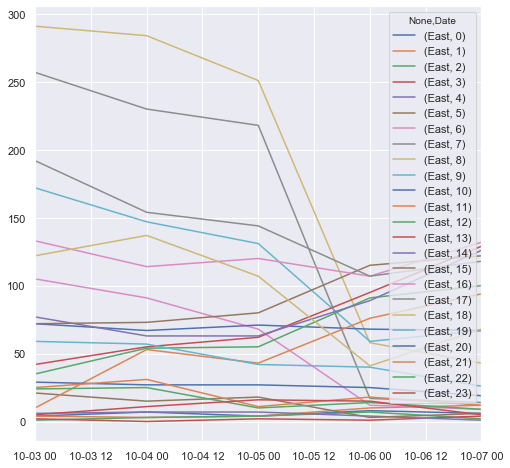

In [15]:
first_five_east.plot(figsize=(8, 8))

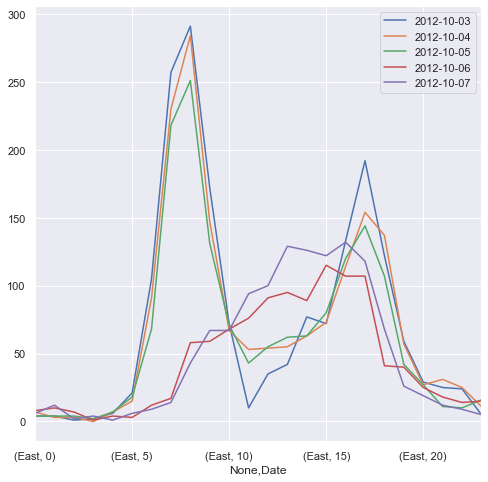

In [16]:
first_five_east.T.plot(figsize=(8, 8))

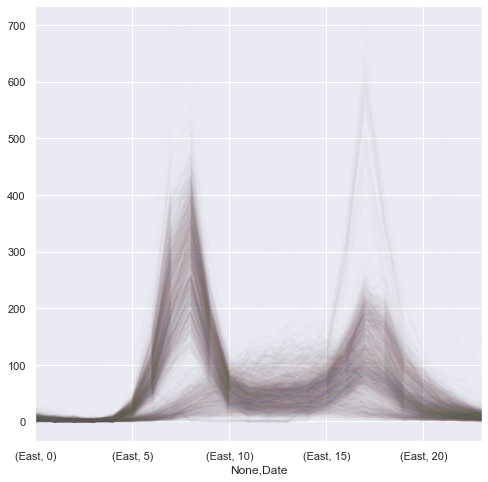

In [17]:
east = pivoted.iloc[:, :24]
east.T.plot(legend=False, alpha=0.01, figsize=(8, 8))

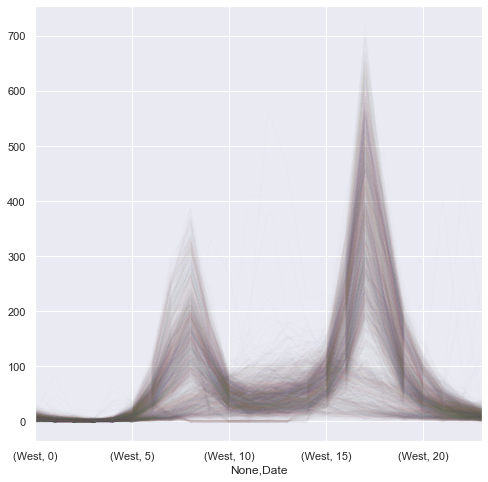

In [18]:
# to do:
west = pivoted.iloc[:, 24:]
west.T.plot(legend=False, alpha=0.01, figsize=(8, 8))

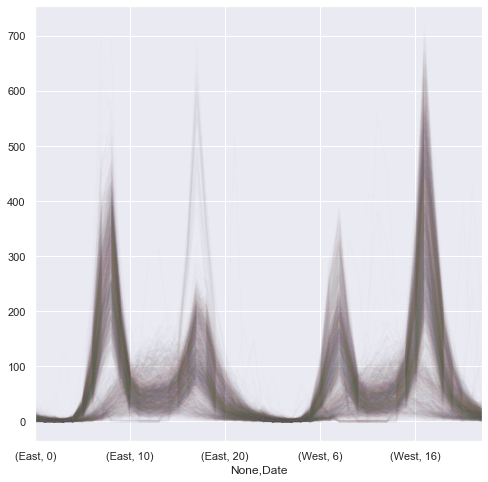

In [19]:
pivoted.T.plot(legend=False, alpha=0.01, figsize=(8, 8))

In [20]:
X = pivoted.values
X.shape

(2189, 48)

In [21]:
from sklearn.decomposition import PCA

#Xpca = PCA(n_components=2).fit_transform(X)
Xpca = PCA(0.90, svd_solver='full').fit_transform(X)
Xpca.shape

(2189, 3)

## 3 components are needed to describe at least 90% of the total variance

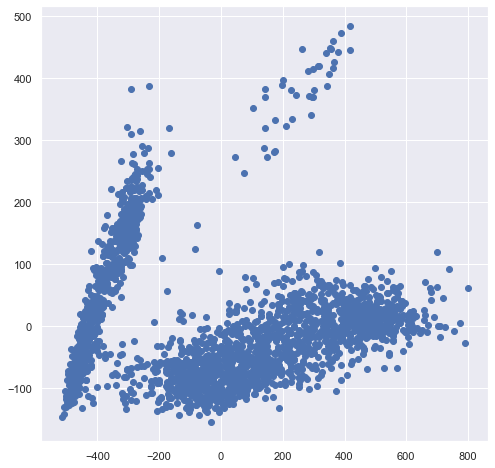

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:,0], Xpca[:, 1])

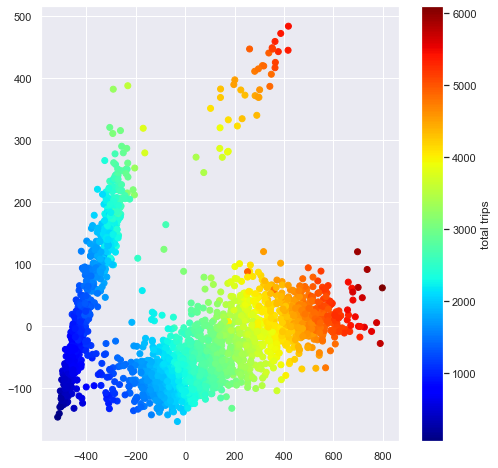

In [23]:
total_trips = X.sum(1)

plt.figure(figsize=(8, 8))
plt.scatter(
    Xpca[:, 0],
    Xpca[:, 1],
    c=total_trips,
    cmap='jet'
)

plt.colorbar(label='total trips');

In [24]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(Xpca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
cluster_label = gmm.predict(Xpca)
cluster_label

array([0, 0, 0, ..., 2, 1, 1], dtype=int64)

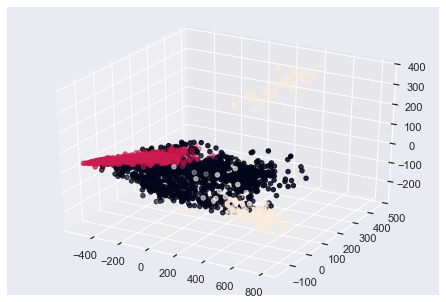

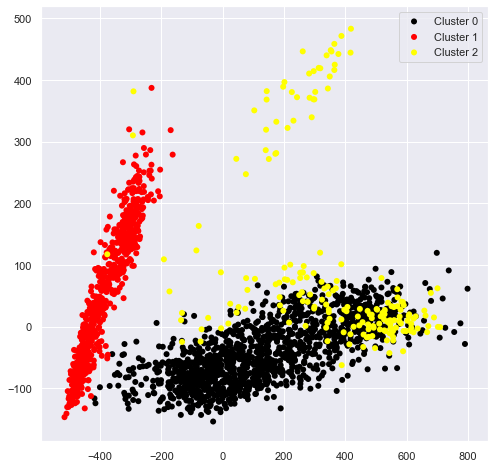

In [26]:
# plot in 3D 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=cluster_label)
pyplot.show()

# On to 2D plane

plt.figure(figsize=(8, 8))

for i, color in enumerate(['black', 'red', 'yellow']):
    inds = cluster_label == i
    x, y = Xpca[inds, 0], Xpca[inds, 1]
    plt.scatter(x, y, c=color, label="Cluster {}".format(i),
               edgecolors='none')

plt.legend()

In [27]:
pivoted['Cluster'] = cluster_label
data = data.join(pivoted['Cluster'], on=data.index.date)
data.head()

,West,East,Total,Cluster
Date,,,,
2012-10-03 00:00:00,9.0,4.0,13.0,0
2012-10-03 01:00:00,6.0,4.0,10.0,0
2012-10-03 02:00:00,1.0,1.0,2.0,0
2012-10-03 03:00:00,3.0,2.0,5.0,0
2012-10-03 04:00:00,1.0,6.0,7.0,0


In [28]:
by_hour = data.groupby(['Cluster', data.index.time]).mean()

In [29]:
by_hour.head()

West      East     Total
Cluster                                       
0       00:00:00  5.443268  4.434947  9.878215
        01:00:00  2.541604  2.254917  4.796520
        02:00:00  1.615734  1.680030  3.295764
        03:00:00  1.232980  1.465961  2.698941
        04:00:00  3.012859  4.189107  7.201967

In [30]:
by_hour.tail()

West       East       Total
Cluster                                            
2       19:00:00  133.989637  97.025907  231.015544
        20:00:00   74.932642  58.896373  133.829016
        21:00:00   43.818653  38.569948   82.388601
        22:00:00   29.051813  22.487047   51.538860
        23:00:00   18.056995  13.056995   31.113990

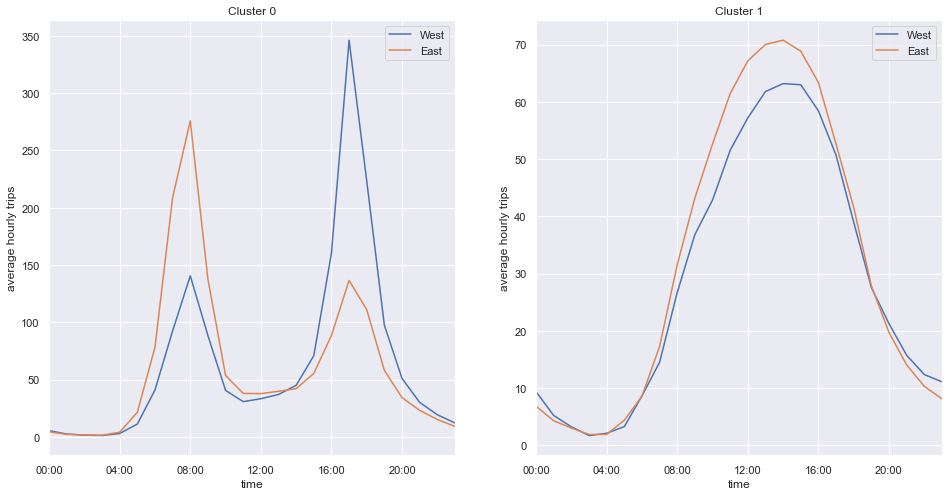

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
hourly_ticks = 4 * 60 * 60 * np.arange(6)

for i, ax in enumerate(axes.flatten()[:2]):
    by_hour.loc[i].plot(y="West", ax=ax, xticks=hourly_ticks)
    by_hour.loc[i].plot(y="East", ax=ax, xticks=hourly_ticks)
    ax.set_title('Cluster {0}'.format(i))
    ax.set_ylabel('average hourly trips')

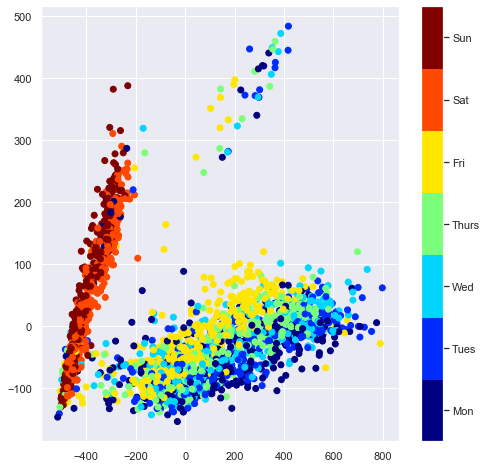

In [32]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek

plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [33]:
results = pd.DataFrame({'cluster': cluster_label,
                        'is_weekend': (dayofweek > 4),
                        'weekday': pivoted.index.map(lambda x: x.strftime('%a'))},
                       index=pivoted.index)
results.head()

,cluster,is_weekend,weekday
2012-10-03,0,False,Wed
2012-10-04,0,False,Thu
2012-10-05,0,False,Fri
2012-10-06,1,True,Sat
2012-10-07,1,True,Sun


In [34]:
results[results["cluster"]==0]

,cluster,is_weekend,weekday
2012-10-03,0,False,Wed
2012-10-04,0,False,Thu
2012-10-05,0,False,Fri
2012-10-08,0,False,Mon
2012-10-09,0,False,Tue
2012-10-10,0,False,Wed
2012-10-11,0,False,Thu
2012-10-12,0,False,Fri
2012-10-15,0,False,Mon
2012-10-16,0,False,Tue


In [35]:
results[results["cluster"]==1]

,cluster,is_weekend,weekday
2012-10-06,1,True,Sat
2012-10-07,1,True,Sun
2012-10-13,1,True,Sat
2012-10-14,1,True,Sun
2012-10-20,1,True,Sat
2012-10-21,1,True,Sun
2012-10-27,1,True,Sat
2012-10-28,1,True,Sun
2012-11-03,1,True,Sat
2012-11-04,1,True,Sun


In [36]:
results[results["cluster"]==2]

,cluster,is_weekend,weekday
2013-03-29,2,False,Fri
2013-04-24,2,False,Wed
2013-06-28,2,False,Fri
2013-07-05,2,False,Fri
2013-07-19,2,False,Fri
2013-07-26,2,False,Fri
2013-08-09,2,False,Fri
2013-08-16,2,False,Fri
2013-08-30,2,False,Fri
2014-07-25,2,False,Fri


In [37]:
weekend_workdays = results.query('cluster == 0 and is_weekend')
len(weekend_workdays)

0

In [38]:
midweek_holidays = results.query('cluster == 1 and not is_weekend')
len(midweek_holidays)

52

In [39]:
midweek_holidays

,cluster,is_weekend,weekday
2012-11-22,1,False,Thu
2012-11-23,1,False,Fri
2012-12-24,1,False,Mon
2012-12-25,1,False,Tue
2012-12-31,1,False,Mon
2013-01-01,1,False,Tue
2013-05-27,1,False,Mon
2013-07-04,1,False,Thu
2013-09-02,1,False,Mon
2013-11-28,1,False,Thu


In [40]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018', return_name=True)
holidays

2012-01-02                 New Years Day
2012-01-16    Dr. Martin Luther King Jr.
2012-02-20                Presidents Day
2012-05-28                   MemorialDay
2012-07-04                      July 4th
2012-09-03                     Labor Day
2012-10-08                  Columbus Day
2012-11-12                  Veterans Day
2012-11-22                  Thanksgiving
2012-12-25                     Christmas
2013-01-01                 New Years Day
2013-01-21    Dr. Martin Luther King Jr.
2013-02-18                Presidents Day
2013-05-27                   MemorialDay
2013-07-04                      July 4th
2013-09-02                     Labor Day
2013-10-14                  Columbus Day
2013-11-11                  Veterans Day
2013-11-28                  Thanksgiving
2013-12-25                     Christmas
2014-01-01                 New Years Day
2014-01-20    Dr. Martin Luther King Jr.
2014-02-17                Presidents Day
2014-05-26                   MemorialDay
2014-07-04      

In [41]:
holidays_all = pd.concat([holidays,
                         "Day Before " + holidays.shift(-1, 'D'),
                         "Day After " + holidays.shift(1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head()

2012-01-01                 Day Before New Years Day
2012-01-02                            New Years Day
2012-01-03                  Day After New Years Day
2012-01-15    Day Before Dr. Martin Luther King Jr.
2012-01-16               Dr. Martin Luther King Jr.
dtype: object